In [2]:
import os


In [3]:
from openbb import obb

In [4]:
obb.account.login(pat=os.environ['OPENBB_KEY'])

/home/lemur/code/projects/sureshot-price-predictor/devenv/lib/python3.10/site-packages/openbb_core/app/service/hub_service.py:236: UserWarning: 
Deprecated v3 credentials found.

'API_KEY_FINANCIALMODELINGPREP' -> 'FMP_API_KEY'

You can update them at https://my.openbb.co/app/platform/credentials.
  warn(


In [5]:
import pandas as pd

In [6]:
import numpy as np
import scipy

In [7]:
df = pd.read_csv('MARA_062024weekend.csv')
df

,date,open,high,low,close,volume
0,2023-06-02,10.320000,10.39,9.570000,10.030000,32549100
1,2023-06-05,9.730000,9.98,9.060000,9.190000,35660400
2,2023-06-06,8.950000,10.13,8.470000,10.080000,53229200
3,2023-06-07,10.000000,10.58,9.430000,9.550000,39054100
4,2023-06-08,9.610000,9.89,9.530000,9.570000,19797200
...,...,...,...,...,...,...
246,2024-05-24,20.260000,21.73,19.860001,21.209999,46579800
247,2024-05-28,21.150000,22.27,20.150000,20.730000,49579900
248,2024-05-29,20.350000,21.10,20.110001,20.240000,31746400
249,2024-05-30,20.540001,21.18,19.760000,20.040001,47554300


In [10]:
from priceprediction import PricePredictor

In [11]:
df["avgPrice"] = (
            df["high"] + df["low"] + df["close"]
        ) / 3

In [13]:
stockData = df[["date", "avgPrice"]]

In [17]:
currentPrice = df["close"].iloc[-1]

In [18]:
currentPrice

19.520000457763672

In [14]:
prices = stockData["avgPrice"].to_list()

In [16]:
prices

[9.99666659037272,
 9.40999984741211,
 9.56000010172526,
 9.853333473205566,
 9.663333257039389,
 9.466666539510092,
 9.329999923706055,
 9.640000025431315,
 9.743333180745443,
 9.336666425069174,
 9.733333269755045,
 11.086666742960611,
 12.373333295186361,
 11.883333524068197,
 12.4366668065389,
 12.086666742960611,
 12.976666768391928,
 13.146666526794434,
 13.770000139872232,
 13.876666386922201,
 14.96999994913737,
 15.323333422342936,
 15.266666730244955,
 15.883333206176758,
 16.37999979654948,
 17.176666259765625,
 17.3000005086263,
 18.60333315531413,
 18.606666564941406,
 17.633333841959637,
 17.049999872843426,
 17.583333333333332,
 17.326666514078777,
 16.839999516805012,
 16.266667048136394,
 16.56000010172526,
 16.68999989827474,
 16.393333435058594,
 16.536667505900066,
 17.246667226155598,
 16.53666655222575,
 16.72333335876465,
 16.640000025431316,
 16.160000165303547,
 15.026666323343912,
 15.513333320617676,
 15.786666870117188,
 14.99666690826416,
 14.79000027974446

In [15]:
returns = [
    np.log(prices[index + 1] / prices[index])
    for index in range(len(prices) - 1)
]
returns

[-0.06047875907908511,
 0.015814800322243083,
 0.03022208390328665,
 -0.019471175237059213,
 -0.0205618033032369,
 -0.014541836385037296,
 0.03268610457857665,
 0.010662163533739076,
 -0.04263400006659363,
 0.04160713934640745,
 0.13018677790415598,
 0.10980042418862487,
 -0.04040674192407646,
 0.04551223556890421,
 -0.028546186840883385,
 0.07104995782250924,
 0.013015349633611478,
 0.04632409247135821,
 0.007716429481117929,
 0.07583944265446727,
 0.023328531924889713,
 -0.003704920342243076,
 0.039598526809894445,
 0.03079073257781584,
 0.04749078397859259,
 0.007154680921247811,
 0.07263423565892534,
 0.0001791674099034884,
 -0.053728854932190435,
 -0.03364088276907329,
 0.030801287416403995,
 -0.014704751949366247,
 -0.028489751617808715,
 -0.03463893247889178,
 0.017872107457944025,
 0.007819576478817569,
 -0.017934977253541897,
 0.008705434069480248,
 0.042038732135483176,
 -0.04203878980576906,
 0.011224820624346897,
 -0.004995514427373557,
 -0.02927037359925768,
 -0.0727126856

In [19]:
dailyVolatility = np.std(returns)
dailyVolatility

0.058567608336546194

In [20]:
avgReturn = np.mean(returns)
avgReturn

0.0027114367640952977

In [21]:
volatility = dailyVolatility * np.sqrt(252)
volatility

0.9297319592540073

In [28]:
prices[-21]

16.706666310628254

In [29]:
prices[-1]

19.689999898274742

In [22]:
logRate = (
    np.log(prices[-1] / prices[-21])
) / 21
logRate

0.007823955592194922

In [25]:
drift = dailyVolatility**2 / 2 + logRate
drift

0.00953903796532646

In [54]:
superLogRate = (
    np.log(prices[-1] / prices[0])
) / len(prices)
superLogRate

0.0027006342271865477

In [55]:
superDrift = dailyVolatility**2 / 2 + superLogRate
superDrift

0.004415716600318085

In [27]:
import matplotlib.pyplot as plt

In [84]:
# driftOverTime = [prices[-21] * np.exp(drift * _) for _ in range(42)]
driftOverTime = [prices[0] * np.exp(drift * _) for _ in range(len(prices)+21)]

In [83]:
# superDriftOverTime = [prices[-21] * np.exp(superDrift * _) for _ in range(42)]
superDriftOverTime = [prices[0] * np.exp(superDrift * _) for _ in range(len(prices)+21)]

In [61]:
interestRate = 0.05

In [82]:
# superDriftPlusInterest = [prices[-21] * ((1 + interestRate) ** (_ / 365) * np.exp(superDrift * _)) for _ in range(42)]
superDriftPlusInterest = [prices[0] * ((1 + interestRate) ** (_ / 365) * np.exp(superDrift * _)) for _ in range(len(prices)+21)]
superDriftPlusInterest

[9.99666659037272,
 10.042248915457751,
 10.088039084661757,
 10.134038045702466,
 10.180246750618975,
 10.226666155791438,
 10.273297221960865,
 10.320140914249006,
 10.36719820217833,
 10.414470059692082,
 10.461957465174466,
 10.50966140147085,
 10.55758285590815,
 10.605722820315247,
 10.65408229104351,
 10.702662268987426,
 10.751463759605318,
 10.800487772940146,
 10.849735323640411,
 10.89920743098117,
 10.948905118885117,
 10.998829415943783,
 11.048981355438809,
 11.099361975363362,
 11.14997231844359,
 11.200813432160219,
 11.25188636877023,
 11.303192185328623,
 11.354731943710325,
 11.406506710632133,
 11.458517557674822,
 11.510765561305297,
 11.563251802898895,
 11.615977368761762,
 11.668943350153315,
 11.722150843308855,
 11.775600949462246,
 11.829294774868695,
 11.883233430827671,
 11.937418033705889,
 11.991849704960416,
 12.046529571161892,
 12.101458764017831,
 12.156638420396066,
 12.212069682348254,
 12.267753697133536,
 12.323691617242257,
 12.379884600419848,
 

In [87]:
superDriftOverTime[-14]

31.233979206823527

In [73]:
driftOverTime[-1]

24.702596921437078

In [33]:
prices[-21:]

[16.706666310628254,
 17.619999567667644,
 19.976666768391926,
 20.196666717529297,
 19.71333376566569,
 19.929999669392902,
 18.023333231608074,
 17.55666669209798,
 17.6999994913737,
 19.46999994913737,
 19.80666669209798,
 19.863333384195965,
 21.336666742960613,
 21.673333485921223,
 21.666666666666668,
 20.503333409627277,
 20.933333079020183,
 21.049999872843426,
 20.483333587646484,
 20.326667149861652,
 19.689999898274742]

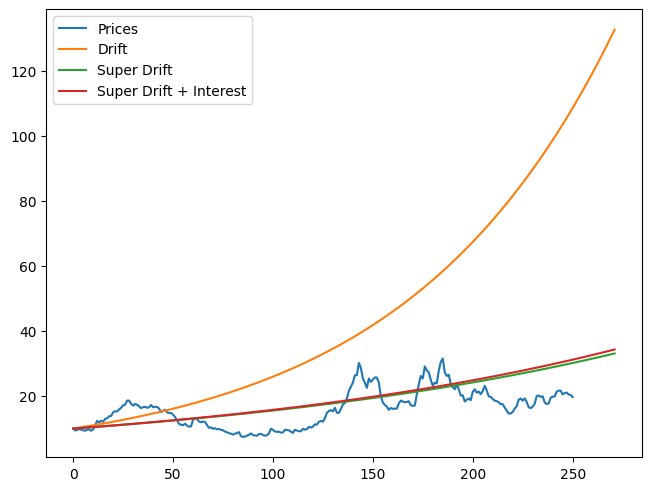

In [85]:
fig, ax = plt.subplots(layout='constrained')
# ax.plot(range(21), prices[-21:], label='Prices')
# ax.plot(range(42), driftOverTime, label='Drift')
# ax.plot(range(42), superDriftOverTime, label='Super Drift')
# ax.plot(range(42), superDriftPlusInterest, label='Super Drift + Interest')
ax.plot(range(len(prices)), prices, label='Prices')
ax.plot(range(len(prices)+21), driftOverTime, label='Drift')
ax.plot(range(len(prices)+21), superDriftOverTime, label='Super Drift')
ax.plot(range(len(prices)+21), superDriftPlusInterest, label='Super Drift + Interest')
ax.legend()
# fig

In [23]:
interestRate = 0.05

In [24]:
timePeriod = 7

In [ ]:
meanEndPrice = currentPrice * (
    (1 + interestRate) ** (timePeriod / 365) + np.exp(pp.drift * timePeriod)
)

----

In [4]:
obb.equity.price.historical("MARA", start_date=None, interval='1d', include_actions=False, provider="yfinance").to_df()

,open,high,low,close,volume
date,,,,,
2023-05-22,9.170000,9.720000,8.950000,9.670000,25877200
2023-05-23,9.750000,10.360000,9.260000,9.320000,30437700
2023-05-24,9.150000,9.610000,8.860000,9.430000,28986400
2023-05-25,9.490000,9.570000,8.780000,9.110000,28309500
2023-05-26,9.160000,9.690000,8.850000,8.930000,31666500
...,...,...,...,...,...
2024-05-15,18.870001,20.230000,17.980000,20.200001,53512000
2024-05-16,19.850000,20.440001,19.330000,19.650000,32569100
2024-05-17,20.190001,20.879999,19.260000,19.450001,48373500


In [6]:
obb.equity.price.historical("MARA240524C00022000", start_date=None, interval='1m', include_actions=False, provider="yfinance").to_df()

,open,high,low,close,volume
date,,,,,
2024-05-16 09:30:00,0.56,0.56,0.56,0.56,0
2024-05-16 09:32:00,0.60,0.60,0.60,0.60,63
2024-05-16 09:33:00,0.68,0.68,0.68,0.68,24
2024-05-16 09:34:00,0.68,0.68,0.68,0.68,32
2024-05-16 09:36:00,0.63,0.72,0.63,0.72,63
...,...,...,...,...,...
2024-05-21 11:55:00,0.66,0.66,0.66,0.66,17
2024-05-21 11:56:00,0.65,0.65,0.65,0.65,17
2024-05-21 11:57:00,0.69,0.69,0.69,0.69,112
